In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("student-mat.csv",delimiter=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data = data[['G1','G2','G3']]
traing_data = data[0:340]
test_data = data[340:]
print(traing_data.shape,test_data.shape)

(340, 3) (55, 3)


In [4]:
def function(x,m,c):
    y = (m*x) + c
    return y

In [5]:
def find_cost(y_prd,y_ord):
    delta = y_ord-y_prd
    delta = delta * delta
    return delta

In [6]:
l_rate = 0.1

In [7]:
df = pd.DataFrame(traing_data[["G1","G3"]])
df.columns = ["x","y"]
df

,x,y
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10
...,...,...
335,16,15
336,14,13
337,7,0
338,16,17


In [8]:
df["y_prd"] = function(df.x,1,0)
df

,x,y,y_prd
0,5,6,5
1,5,6,5
2,7,10,7
3,15,15,15
4,6,10,6
...,...,...,...
335,16,15,16
336,14,13,14
337,7,0,7
338,16,17,16


In [9]:
find_cost(df.y_prd,df.y).mean()

7.870588235294117

In [10]:
trys = np.arange(0,2,0.05)
trys

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])

In [13]:
l = []
for i in trys:
    df.y_prd = function(df.x,i,-1.49)
    l.append(find_cost(df.y_prd,df.y).mean())
for i in range(len(l)):
    print(l[i]," --> ",trys[i])

164.82768823529412  -->  0.0
150.85131029411764  -->  0.05
137.5253588235294  -->  0.1
124.84983382352941  -->  0.15000000000000002
112.82473529411766  -->  0.2
101.45006323529412  -->  0.25
90.72581764705882  -->  0.30000000000000004
80.65199852941176  -->  0.35000000000000003
71.22860588235295  -->  0.4
62.45563970588236  -->  0.45
54.3331  -->  0.5
46.86098676470588  -->  0.55
40.03929999999999  -->  0.6000000000000001
33.86803970588235  -->  0.65
28.347205882352934  -->  0.7000000000000001
23.476798529411763  -->  0.75
19.25681764705882  -->  0.8
15.687263235294113  -->  0.8500000000000001
12.768135294117647  -->  0.9
10.499433823529412  -->  0.9500000000000001
8.881158823529413  -->  1.0
7.913310294117646  -->  1.05
7.595888235294117  -->  1.1
7.928892647058825  -->  1.1500000000000001
8.91232352941177  -->  1.2000000000000002
10.546180882352942  -->  1.25
12.830464705882358  -->  1.3
15.76517500000001  -->  1.35
19.350311764705896  -->  1.4000000000000001
23.58587500000002  -->  

Text(0, 0.5, 'Cost')

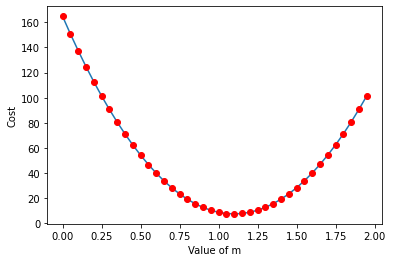

In [12]:
plt.plot(trys,l)
plt.plot(trys,l,"ro")
plt.xlabel("Value of m")
plt.ylabel("Cost")

In [29]:
df2 = pd.DataFrame()
df2["Y_ord"] = test_data.G3
df2["Y_prd"] = function(test_data.G1,1.1,-1.49)
df2["err"] = df2.Y_ord - df2.Y_prd
df2

,Y_ord,Y_prd,err
340,11,10.61,0.39
341,0,9.51,-9.51
342,15,16.11,-1.11
343,0,8.41,-8.41
344,10,10.61,-0.61
345,14,12.81,1.19
346,16,16.11,-0.11
347,9,9.51,-0.51
348,15,12.81,2.19
349,13,10.61,2.39


In [32]:
100 - find_cost(df2.Y_prd,df2.Y_ord).mean()

93.11226363636364

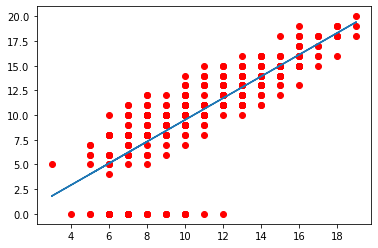

In [47]:
plt.plot(data.G1,data.G3,'ro')
plt.plot(data.G1,[function(x,1.1,-1.49) for x in data.G1])